<h1>Kmeans</h1>
<p>sem utilizaçao de bibiotecas </p>
<p>com utilizaçao da bibioteca Sklearn </p>




<h2>Qual a influência da escolha do centroíde no kmeans?</h2>
<p>Como o centroide é escolhido de forma aleatória, podemos escolher "centros " não representativos e por causa disso categorizar de forma errada, por exemplo, temos três classes e escolhemos os centros todos pertecente a primeira classe, as "classes" encontradas não corresponderão ao desejado; agrupando um elemento a um grupo enquanto deveria pertencer a outro </p>
<p>Para reduzir esse erro foi introduzido o conceito de iterações ou épocas no algoritmo. Fazendo com que o algoritmo seja rodado diversas vezes e em cada vez a escolha  dos centros inciados de forma aleatórias, de forma que a cada iteração é desejado que seja minimizado o erro e tentando agrupar em cluster significativos</p>

In [ ]:
#import 
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [12]:
# Importing the dataset
data = pd.read_csv('dataset.csv')
print("Input Data and Shape")
print(data.shape)
data.head()


Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


Initial Centroids
[[50. 31.]
 [18. 15.]
 [29. 43.]]


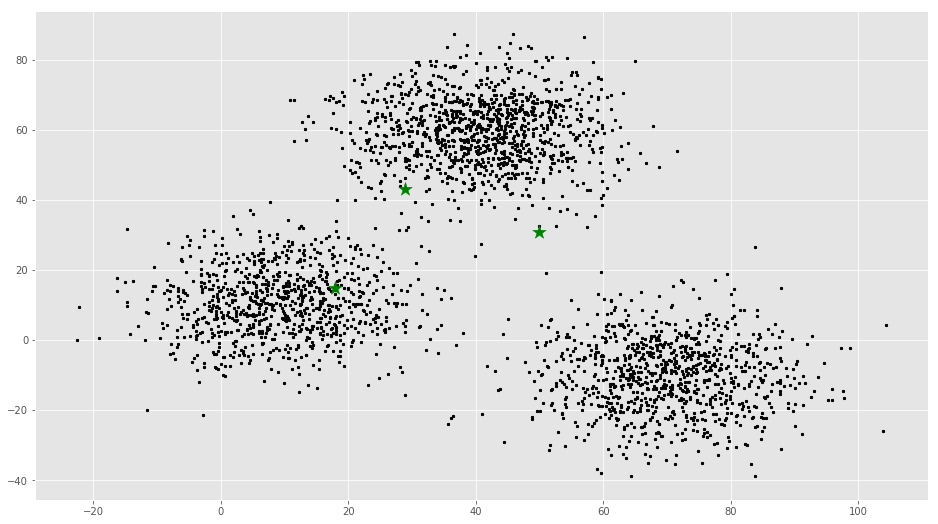

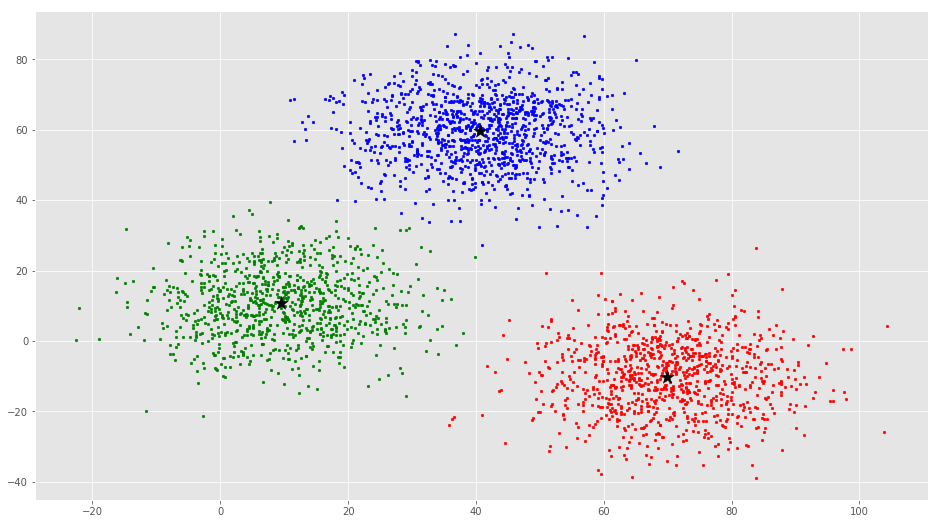

In [13]:
'''

iris = load_iris()
data = iris.data #Armazeno os dados para treino.
labels = iris.target #Aqui são os Labels
labels_names = iris.target_names # E aqui o nome de cada Label
'''

# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')




==========================================================
scikit-learn
==========================================================


In [14]:



# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Scratch
[[ 69.92419  -10.119641]
 [  9.478045  10.686052]
 [ 40.683628  59.715893]]
sklearn
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]
